In [1]:
import pandas as pd
import re
import inflect
from datetime import datetime
import matplotlib.pyplot as plt
#from nun2words import nun2words


C:\Users\joseg\AppData\Local\Temp\ipykernel_19000\1805099770.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



lectura de datos

In [2]:
tarea=pd.read_csv('C:/Users/joseg/OneDrive/Documentos/CTG.csv', low_memory=False)

tarea #genera una muestra aleatoria de tamaño "n" de datos del dataframe. 

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,S8001045.dsp,6/6/1998,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,S8001045.dsp,6/6/1998,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
tarea.loc[0, 'Date'] #Este comando nmos sirve para extraer el datos que se encuentra en la columna "date" de la posición 0 del DF 
tarea.loc[1000] #sin más condicones por delante, este loc nos permite extraern un registro en base a la posición que ocupa.


FileName    S0001031.dat
Date           8/19/1996
SegFile      CTG1001.txt
b                 1535.0
e                 2340.0
LBE                129.0
LB                 129.0
AC                  12.0
FM                   0.0
UC                   5.0
ASTV                22.0
MSTV                 1.6
ALTV                 0.0
MLTV                 0.5
DL                   0.0
DS                   0.0
DP                   0.0
DR                   0.0
Width               58.0
Min                108.0
Max                166.0
Nmax                 4.0
Nzeros               0.0
Mode               141.0
Mean               143.0
Median             144.0
Variance             9.0
Tendency             0.0
A                    0.0
B                    0.0
C                    0.0
D                    1.0
E                    0.0
AD                   0.0
DE                   0.0
LD                   0.0
FS                   0.0
SUSP                 0.0
CLASS                4.0
NSP                  1.0


In [4]:
tarea.info(5) #Muestra las columnas del Df así como el tipo de datos que recibe cada una 
list (tarea.columns) #le estoy diciendo que me LISTE las columnas del DF llamddo "tarea"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa

['FileName',
 'Date',
 'SegFile',
 'b',
 'e',
 'LBE',
 'LB',
 'AC',
 'FM',
 'UC',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'DL',
 'DS',
 'DP',
 'DR',
 'Width',
 'Min',
 'Max',
 'Nmax',
 'Nzeros',
 'Mode',
 'Mean',
 'Median',
 'Variance',
 'Tendency',
 'A',
 'B',
 'C',
 'D',
 'E',
 'AD',
 'DE',
 'LD',
 'FS',
 'SUSP',
 'CLASS',
 'NSP']

Ingenieria de datos


In [5]:
tarea['SegFile'] = tarea['SegFile'].str.replace('.txt',' ') #La columna Seg File del Df se llenara de un una nueva columna que se deriva de la misma columna
#con la excepción que del tipo string, vamos a reemplazar todo lo que diga .txt con el carácter nulo.
tarea  #CON ESTO YA HEMOS QUITADO EL .TXT DE LA COLUMNA SEGFILE

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,S8001045.dsp,6/6/1998,CTG2127,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,S8001045.dsp,6/6/1998,CTG2128,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Defino la expresión regular que me permita sacar todo lo que precede despues del punto
exp=  r'(^.*?)\.' #cualquier carácter '.' cero o más veces '*' de manera no codiciosa '?' desde el principio de la cadena '^' hasta el primer punto

# Extraer ambas partes utilizando la expresión regular y expandir el resultado en dos columnas
tarea['FileName'] = tarea['FileName'].str.extract(exp)
tarea

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10,12/1/1996,CTG0001,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1,5/3/1996,CTG0002,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1,5/3/1996,CTG0003,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1,5/3/1996,CTG0004,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1,5/3/1996,CTG0005,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,S8001045,6/6/1998,CTG2127,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,S8001045,6/6/1998,CTG2128,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Aqui lo que hacemos es llenar de nueva cuyenta la columna Date con pandas en el formato %m/%d/%Y'
tarea['Date'] = pd.to_datetime(tarea['Date'], format='%m/%d/%Y')

# agragando los ceros en las celdad de mes y dia
tarea['Date'] = tarea['Date'].dt.strftime('%m/%d/%Y')

# Mstrando la columna con los datos normalizados.
tarea['Date']

0       12/01/1996
1       05/03/1996
2       05/03/1996
3       05/03/1996
4       05/03/1996
           ...    
2124    06/06/1998
2125    06/06/1998
2126           NaN
2127           NaN
2128           NaN
Name: Date, Length: 2129, dtype: object

In [8]:
tarea['Año']=tarea['Date'].str[-4:]
#tarea.drop(columns='Año_texto', inplace=True)

In [9]:
tarea['Año'].astype(str) #conevrtí el año a tipo str ya que ya función así le es mas sencillo pasarlo a texto

0       1996
1       1996
2       1996
3       1996
4       1996
        ... 
2124    1998
2125    1998
2126     nan
2127     nan
2128     nan
Name: Año, Length: 2129, dtype: object

In [37]:
# Aqui ya estoy convirtiendo el año a texto, solo que solo pudé en inglés
inflector = inflect.engine()


# Función para convertir un número en formato cadena a su equivalente en palabras
def convertir_año(numero):
    try:        
        nun_conv= int(numero)        
        numero_en_palabras = inflector.number_to_words(nun_conv)
        return numero_en_palabras
    except ValueError:        
        return numero

tarea['Año en texto en inglés'] = tarea['Año'].apply(convertir_año)

#tarea.drop(columns='Año', inplace=True)
tarea[['Año', 'Año en texto en inglés']].sample(7)

,Año,Año en texto en inglés
780,1995,"one thousand, nine hundred and ninety-five"
1882,1998,"one thousand, nine hundred and ninety-eight"
2080,1998,"one thousand, nine hundred and ninety-eight"
638,1996,"one thousand, nine hundred and ninety-six"
1547,1996,"one thousand, nine hundred and ninety-six"
1401,1996,"one thousand, nine hundred and ninety-six"
1916,1998,"one thousand, nine hundred and ninety-eight"


In [46]:
from num2words import num2words

def convertir_año_ruso(numero):
    try:        
        num_conv = int(numero)        
        numero_en_palabras = num2words(num_conv, lang='ru')
        return numero_en_palabras
    except ValueError:        
        return numero

def convertir_año_español(numero):
    try:        
        num_conv = int(numero)        
        numero_en_palabras = num2words(num_conv, lang='es')
        return numero_en_palabras
    except ValueError:        
        return numero

def convertir_año_italiano(numero):
    try:        
        num_conv = int(numero)        
        numero_en_palabras = num2words(num_conv, lang='it')
        return numero_en_palabras
    except ValueError:        
        return numero

def convertir_año_frances(numero):
    try:        
        num_conv = int(numero)        
        numero_en_palabras = num2words(num_conv, lang='fr')
        return numero_en_palabras
    except ValueError:        
        return numero

def convertir_año_aleman(numero):
    try:        
        num_conv = int(numero)        
        numero_en_palabras = num2words(num_conv, lang='de')
        return numero_en_palabras
    except ValueError:        
        return numero

tarea['Año en texto en ruso'] = tarea['Año'].apply(convertir_año_ruso)
tarea['Año en texto en español'] = tarea['Año'].apply(convertir_año_español)
tarea['Año en texto en italiano'] = tarea['Año'].apply(convertir_año_italiano)
tarea['Año en texto en francés'] = tarea['Año'].apply(convertir_año_frances)
tarea['Año en texto en alemán'] = tarea['Año'].apply(convertir_año_aleman)
tarea[['Año','Año en texto en ruso','Año en texto en español', 'Año en texto en inglés','Año en texto en italiano','Año en texto en francés','Año en texto en alemán']].sample(5)
#tarea['Año en texto en ruso'].sample(10)
#tarea['Año en texto en español'].sample(10)
#para sacar una muestra de 10 datos, para ver el funcioinamiento de la función

,Año,Año en texto en ruso,Año en texto en español,Año en texto en inglés,Año en texto en italiano,Año en texto en francés,Año en texto en alemán
1652,1997,одна тысяча девятьсот девяносто семь,mil novecientos noventa y siete,"one thousand, nine hundred and ninety-seven",millenovecentonovantasette,mille neuf cent quatre-vingt-dix-sept,eintausendneunhundertsiebenundneunzig
517,1996,одна тысяча девятьсот девяносто шесть,mil novecientos noventa y seis,"one thousand, nine hundred and ninety-six",millenovecentonovantasei,mille neuf cent quatre-vingt-seize,eintausendneunhundertsechsundneunzig
618,1995,одна тысяча девятьсот девяносто пять,mil novecientos noventa y cinco,"one thousand, nine hundred and ninety-five",millenovecentonovantacinque,mille neuf cent quatre-vingt-quinze,eintausendneunhundertfünfundneunzig
123,1995,одна тысяча девятьсот девяносто пять,mil novecientos noventa y cinco,"one thousand, nine hundred and ninety-five",millenovecentonovantacinque,mille neuf cent quatre-vingt-quinze,eintausendneunhundertfünfundneunzig
253,1996,одна тысяча девятьсот девяносто шесть,mil novecientos noventa y seis,"one thousand, nine hundred and ninety-six",millenovecentonovantasei,mille neuf cent quatre-vingt-seize,eintausendneunhundertsechsundneunzig


In [47]:
tarea

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,SUSP,CLASS,NSP,Año,Año en texto en inglés,Año en texto en ruso,Año en texto en español,Año en texto en italiano,Año en texto en francés,Año en texto en alemán
0,Variab10,12/01/1996,CTG0001,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,9.0,2.0,1996,"one thousand, nine hundred and ninety-six",одна тысяча девятьсот девяносто шесть,mil novecientos noventa y seis,millenovecentonovantasei,mille neuf cent quatre-vingt-seize,eintausendneunhundertsechsundneunzig
1,Fmcs_1,05/03/1996,CTG0002,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,6.0,1.0,1996,"one thousand, nine hundred and ninety-six",одна тысяча девятьсот девяносто шесть,mil novecientos noventa y seis,millenovecentonovantasei,mille neuf cent quatre-vingt-seize,eintausendneunhundertsechsundneunzig
2,Fmcs_1,05/03/1996,CTG0003,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,6.0,1.0,1996,"one thousand, nine hundred and ninety-six",одна тысяча девятьсот девяносто шесть,mil novecientos noventa y seis,millenovecentonovantasei,mille neuf cent quatre-vingt-seize,eintausendneunhundertsechsundneunzig
3,Fmcs_1,05/03/1996,CTG0004,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,6.0,1.0,1996,"one thousand, nine hundred and ninety-six",одна тысяча девятьсот девяносто шесть,mil novecientos noventa y seis,millenovecentonovantasei,mille neuf cent quatre-vingt-seize,eintausendneunhundertsechsundneunzig
4,Fmcs_1,05/03/1996,CTG0005,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,2.0,1.0,1996,"one thousand, nine hundred and ninety-six",одна тысяча девятьсот девяносто шесть,mil novecientos noventa y seis,millenovecentonovantasei,mille neuf cent quatre-vingt-seize,eintausendneunhundertsechsundneunzig
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,S8001045,06/06/1998,CTG2127,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,5.0,2.0,1998,"one thousand, nine hundred and ninety-eight",одна тысяча девятьсот девяносто восемь,mil novecientos noventa y ocho,millenovecentonovantotto,mille neuf cent quatre-vingt-dix-huit,eintausendneunhundertachtundneunzig
2125,S8001045,06/06/1998,CTG2128,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,1.0,1.0,1998,"one thousand, nine hundred and ninety-eight",одна тысяча девятьсот девяносто восемь,mil novecientos noventa y ocho,millenovecentonovantotto,mille neuf cent quatre-vingt-dix-huit,eintausendneunhundertachtundneunzig
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
pip install num2words

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install inflect

Note: you may need to restart the kernel to use updated packages.


In [15]:
import inflect

In [16]:
tarea.describe() #Un análisis rápido que nos da datois estadisticos de los valores númericos

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,878.439793,1702.877234,133.303857,133.303857,2.722484,7.503056,3.669017,47.008933,1.335449,9.884814,...,0.024929,0.038100,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327
std,894.084748,930.919143,9.840844,9.840844,3.560850,39.030452,2.877148,17.210648,0.891543,18.476534,...,0.155947,0.191482,0.180928,0.363094,0.323314,0.218675,0.177248,0.290027,3.026883,0.614377
min,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,1521.000000,2434.750000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,3296.000000,3599.000000,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


#Definición de variables discretas y continuas

In [17]:
var_con=list(tarea.describe())
var_con #creamos una loista con las variables continuas

['b',
 'e',
 'LBE',
 'LB',
 'AC',
 'FM',
 'UC',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'DL',
 'DS',
 'DP',
 'DR',
 'Width',
 'Min',
 'Max',
 'Nmax',
 'Nzeros',
 'Mode',
 'Mean',
 'Median',
 'Variance',
 'Tendency',
 'A',
 'B',
 'C',
 'D',
 'E',
 'AD',
 'DE',
 'LD',
 'FS',
 'SUSP',
 'CLASS',
 'NSP']

In [48]:
var_dis = [x for x in tarea.columns if x not in var_con] #Se crea una lista con las variables que no son continuas.
var_dis

['FileName',
 'Date',
 'SegFile',
 'Año',
 'Año en texto en inglés',
 'Año en texto en ruso',
 'Año en texto en español',
 'Año en texto en italiano',
 'Año en texto en francés',
 'Año en texto en alemán']

In [19]:
def compleltitud_datos(df):
    return df.isnull().sum().sort_values(ascending=False) / df.shape[0]

In [20]:
compleltitud_datos(tarea)

FileName                   0.001409
Date                       0.001409
Mean                       0.001409
Median                     0.001409
Variance                   0.001409
Tendency                   0.001409
A                          0.001409
B                          0.001409
C                          0.001409
D                          0.001409
E                          0.001409
AD                         0.001409
DE                         0.001409
LD                         0.001409
FS                         0.001409
SUSP                       0.001409
CLASS                      0.001409
NSP                        0.001409
Año                        0.001409
Año en texto en inglés     0.001409
Año en texto en ruso       0.001409
Mode                       0.001409
Nzeros                     0.001409
Nmax                       0.001409
Max                        0.001409
SegFile                    0.001409
b                          0.001409
e                          0

Graficas

In [21]:
def hist(df,columns): #aqui se imprimen todos los histogramas
    return df[columns].hist(figsize=(25,20), color='orange', edgecolor='black');

array([[<Axes: title={'center': 'b'}>, <Axes: title={'center': 'e'}>,
        <Axes: title={'center': 'LBE'}>, <Axes: title={'center': 'LB'}>,
        <Axes: title={'center': 'AC'}>, <Axes: title={'center': 'FM'}>],
       [<Axes: title={'center': 'UC'}>, <Axes: title={'center': 'ASTV'}>,
        <Axes: title={'center': 'MSTV'}>,
        <Axes: title={'center': 'ALTV'}>,
        <Axes: title={'center': 'MLTV'}>, <Axes: title={'center': 'DL'}>],
       [<Axes: title={'center': 'DS'}>, <Axes: title={'center': 'DP'}>,
        <Axes: title={'center': 'DR'}>,
        <Axes: title={'center': 'Width'}>,
        <Axes: title={'center': 'Min'}>, <Axes: title={'center': 'Max'}>],
       [<Axes: title={'center': 'Nmax'}>,
        <Axes: title={'center': 'Nzeros'}>,
        <Axes: title={'center': 'Mode'}>,
        <Axes: title={'center': 'Mean'}>,
        <Axes: title={'center': 'Median'}>,
        <Axes: title={'center': 'Variance'}>],
       [<Axes: title={'center': 'Tendency'}>,
        <Axes:

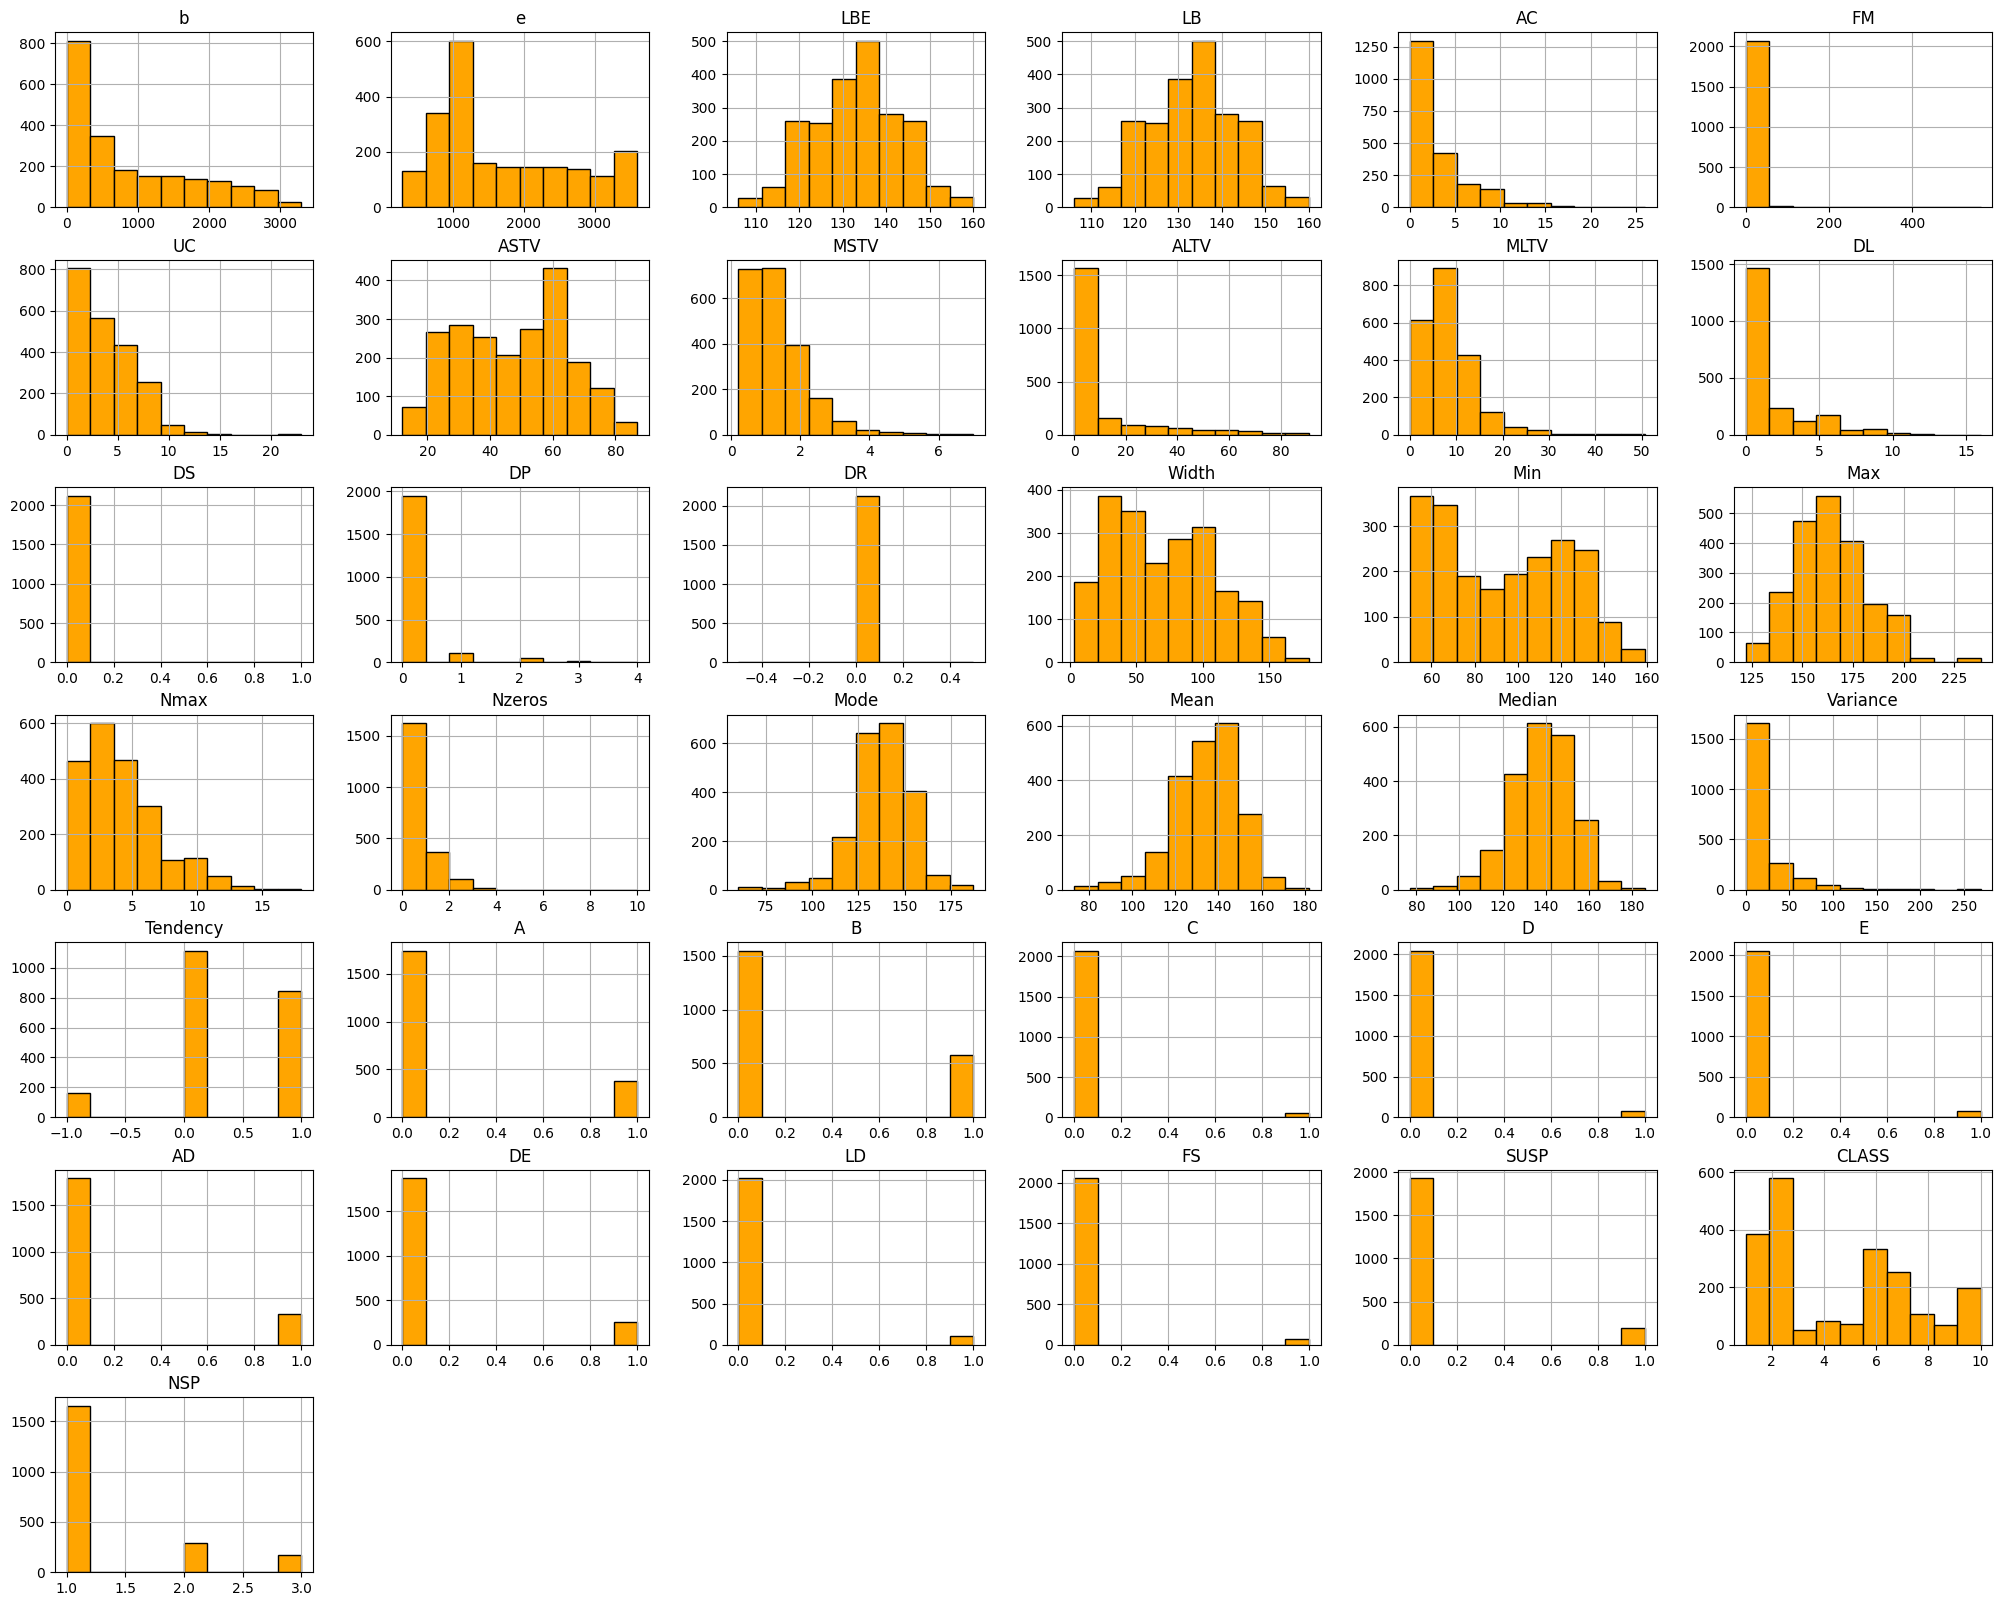

In [22]:
hist(tarea,var_con) #mandamos a una fucnión que grafique, el Df, junto con el conjunto de variables continuas

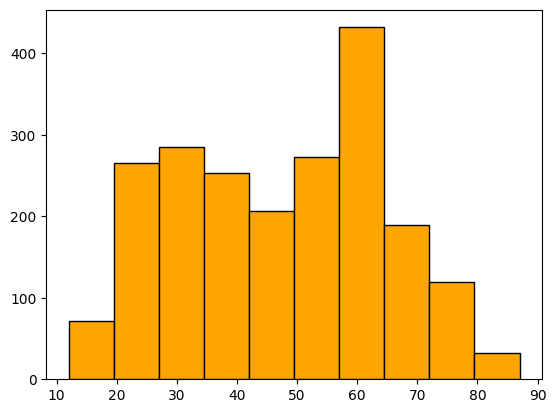

In [49]:
plt.hist(tarea['ASTV'], color='orange', edgecolor='black') #Histograma de la columna b, que coincide con el del grupo de histogramas.
plt.show()

Histograma para la columna: FileName


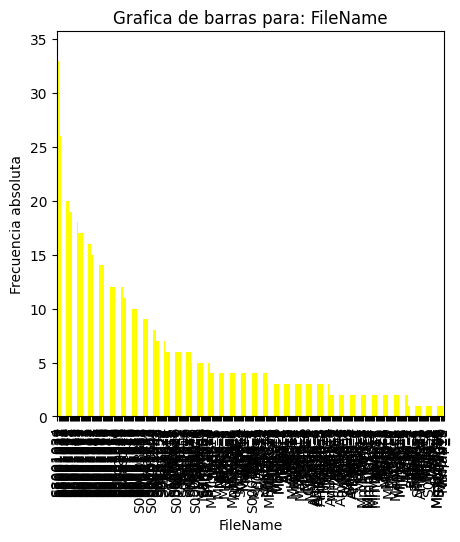

Histograma para la columna: Date


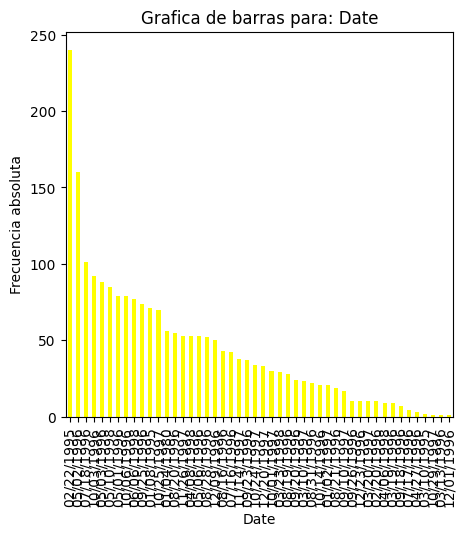

Histograma para la columna: SegFile


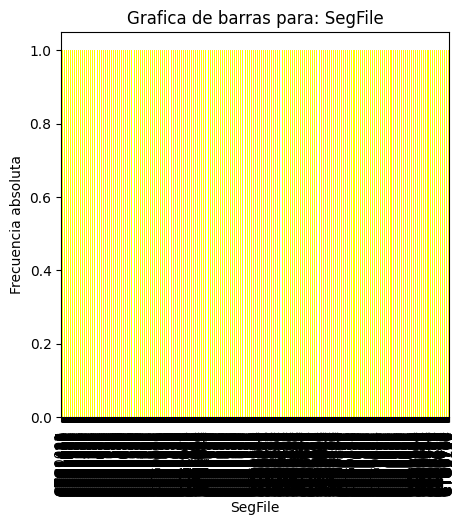

Histograma para la columna: Año


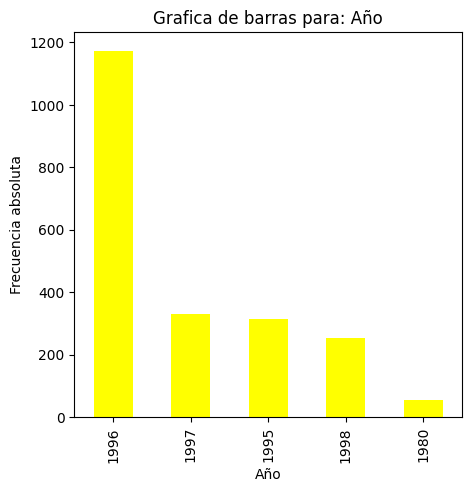

Histograma para la columna: Año en texto en inglés


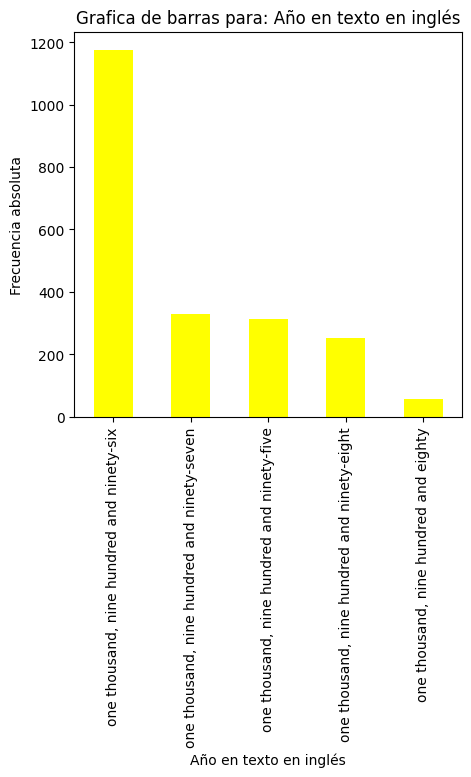

Histograma para la columna: Año en texto en ruso


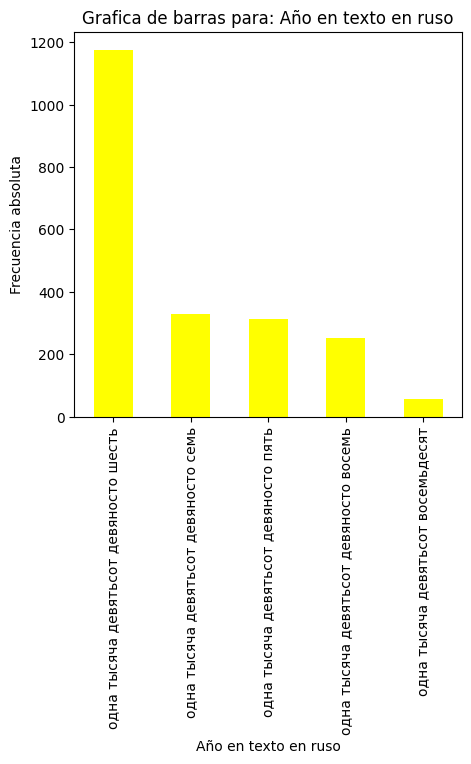

Histograma para la columna: Año en texto en español


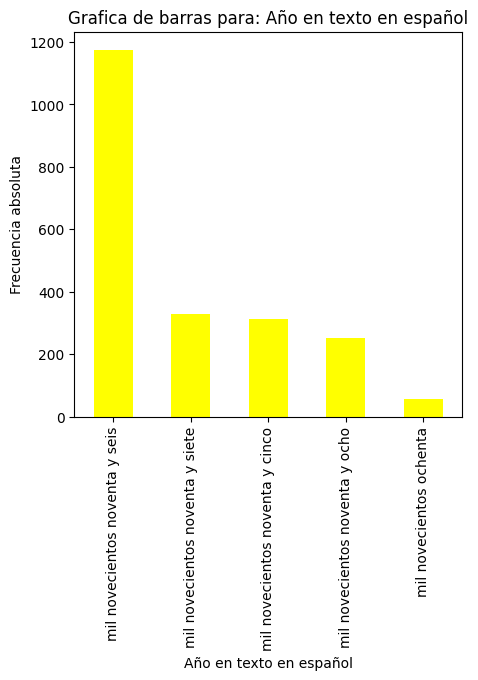

Histograma para la columna: Año en texto en italiano


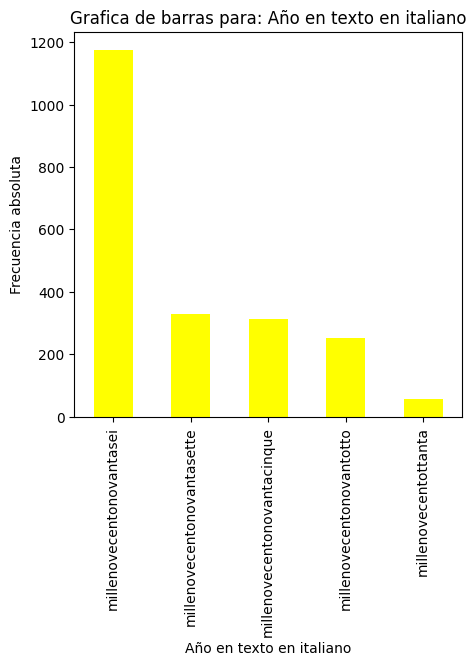

Histograma para la columna: Año en texto en francés


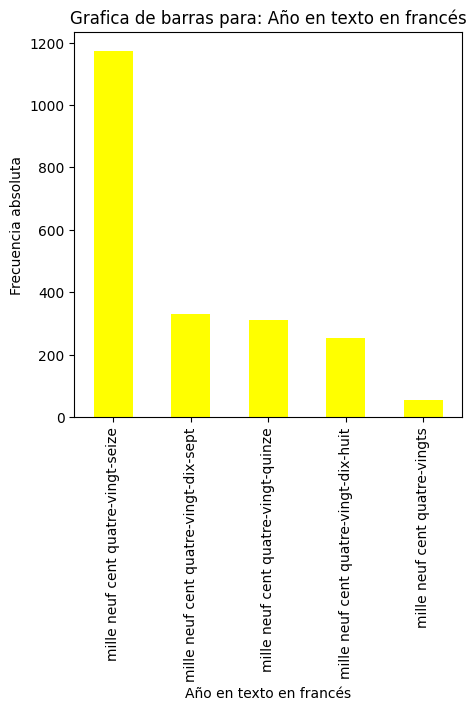

Histograma para la columna: Año en texto en alemán


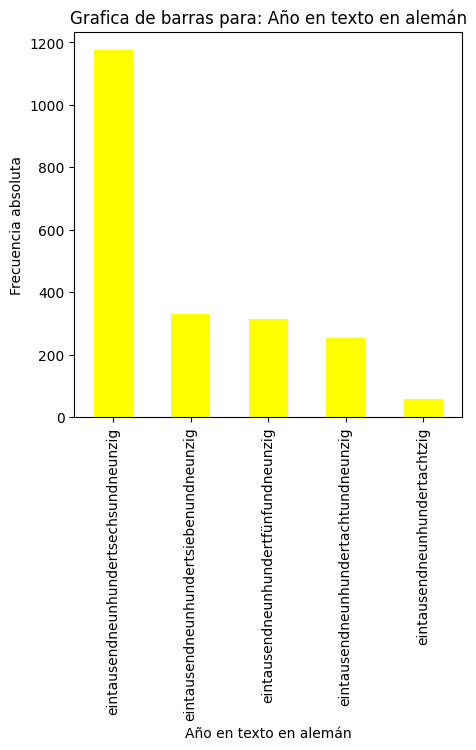

In [56]:
graficar_variables_discretas(tarea,var_dis) #manda todos los conjuntos de columnas de variables discretas a graficar

In [55]:
import matplotlib.pyplot as plt

def graficar_variables_discretas(df, columns):
    for gato in columns: #Gato, juega el papel del "comntador" en el for, en el dataframe que se llama columns
            plt.figure(figsize=(5, 5))
            print(f'Histograma para la columna: {gato}') #Quería ver el funcionamiento de la variable column
            df[gato].value_counts().plot(kind='bar', color='yellow')  #value_counts(), cuenta la frecuencia de cada valor en el dataframe.
            plt.title(f'Grafica de barras para: {gato }')
            plt.xlabel(gato )
            plt.ylabel('Frecuencia absoluta')
            plt.xticks(rotation=90) #el comando df.xticks rota los indices o nombres de las columnas en los histogramas
            plt.show()

In [50]:
import cufflinks as cf

# Configuración offline de cufflinks
cf.go_offline()

def graficar_variables_discretas_cf(df, columns): #Otra manera más estetica de presentar histogramas. Menor código.
    for column in columns:
            df[column].value_counts().iplot(kind='bar', title=f'Gráfico de barras para {column}', xTitle=column, yTitle='Frecuencia')

In [ ]:
graficar_variables_discretas_cf(tarea, var_dis)

Mapas de calor


Los mapas de calor son útiles para visualizar la relación entre dos variables númericas en forma de una matriz codificada por colores, usado principalmente por variables continuas numericas y son demasiado utiles cuando se desean resaltar patrones, correlaciones, o variaciones en datos tabulares grandes; permiten identificar de una manera sencilla áreas de concentración ó dispersión en los datos y son comunes en análisis de datos exploratorios.

In [ ]:
pip install seaborn

In [ ]:
var_con

['b',
 'e',
 'LBE',
 'LB',
 'AC',
 'FM',
 'UC',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'DL',
 'DS',
 'DP',
 'DR',
 'Width',
 'Min',
 'Max',
 'Nmax',
 'Nzeros',
 'Mode',
 'Mean',
 'Median',
 'Variance',
 'Tendency',
 'A',
 'B',
 'C',
 'D',
 'E',
 'AD',
 'DE',
 'LD',
 'FS',
 'SUSP',
 'CLASS',
 'NSP']

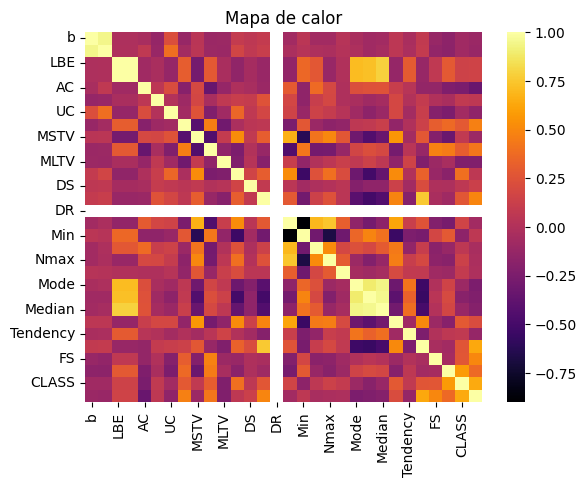

In [ ]:
import seaborn as sns 
#se crea la matriz de corrleación entre dos columnas arbitarias del DF 
matrix = tarea[['b', 'e', 'LBE', 'LB','AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min','Max', 'Nmax', 'Nzeros', 'Mode', 'Mean','Median',
 'Variance',
 'Tendency','LD',
 'FS',
 'SUSP',
 'CLASS',
 'NSP']].corr()

# Graficar el mapa de calor
sns.heatmap(matrix, annot=False, cmap='inferno') #Annot pone el número que existe entre la correelación de cada variable.
plt.title(f'Mapa de calor')
plt.show()

Este mapa de calor nos muestra que hay una relación estrecha entre diversas variables continuas. 
Aunque no precisamente con las de tendencia central

Imputación de datos

In [ ]:
tarea.shape #Número de filas y columnas, en ese orden 

(2129, 42)

In [29]:
from sklearn.impute import SimpleImputer 

ModuleNotFoundError: No module named 'sklearn'

In [26]:
píp install sklearn!

SyntaxError: invalid syntax (2884869218.py, line 1)

In [27]:
tarea['b'].isnull().sum() / tarea.shape[0]

0.0014091122592766556

In [28]:
X = tarea[['b']]
im = SimpleImputer(strategy='mean')
Xi = tarea.DataFrame(im.fit_transform(X), columns=['b'])
lt = []

NameError: name 'SimpleImputer' is not defined